# Read all log.txt

In [1]:
import glob
import pandas as pd
from pandas.core.common import flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = "D:/Dev/ReinforcementLearning/results/CartPole-v1/"

In [3]:
logs = glob.glob(path + "/*/*/*.txt")

In [4]:
def read_file(path):
    values = []
    col = path.split("\\")[-2].split("_")
           
    with open(path, "r") as file:
        for i in file.readlines():
            values.append([path.split("\\")[-3],*col,*i.split("\n")[0].split(",")])
    return values

In [5]:
columns = ["algo","step_train","batch_size", "gamma", "greedy_exploration","network","", "optimizer", "lr", "memories", "max_size", "step", "max", "min", "avg", "sum"]

In [6]:
df = pd.DataFrame([], columns = columns)
for file in logs:
    ite = pd.DataFrame(read_file(file), columns = columns)
    df = pd.concat([df,ite],  ignore_index=True)

In [7]:
df.drop(columns=["max","min","avg"], inplace=True)

# Result

In [8]:
df.head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
0,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,1,9.0
1,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,10,10.0
2,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,20,10.0
3,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,30,9.0
4,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,40,9.0
5,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,50,8.0
6,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,60,9.0
7,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,70,10.0
8,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,80,10.0
9,CategoricalDQN,1,32,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,C51Network,,Adam,0.0001,ExperienceReplay,2048,90,9.0


## Sort by sum and step

In [9]:
for c in ["step_train", "batch_size", "gamma", "lr", "step", "sum"]:
    df[c] = df[c].astype(float)
for c in df.columns:
    if df[c].dtypes  == "object":
        df[c] = df[c].astype('category')

In [10]:
df.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
12340,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,20.0,500.0
12930,DoubleDQN,1.0,32.0,1.00,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,30.0,500.0
31127,DQN,1.0,32.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,30.0,500.0
31716,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,30.0,500.0
34103,DQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,30.0,500.0
11412,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,40.0,500.0
24122,DoubleDQN,32.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.100,ExperienceReplay,2048,40.0,500.0
27997,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,40.0,500.0
29082,DQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,40.0,500.0
30601,DQN,1.0,32.0,1.00,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,40.0,500.0


## Correlation matrix

In [11]:
df_corr = df.copy()

In [12]:
for c in df_corr.columns:
    try:
        df_corr[c] = df_corr[c].cat.codes
    except:
        pass

In [13]:
df_corr.corr()["sum"]

algo                  0.061506
step_train           -0.314323
batch_size            0.044669
gamma                -0.005792
greedy_exploration    0.017274
network               0.076661
                           NaN
optimizer                  NaN
lr                   -0.166335
memories                   NaN
max_size             -0.018768
step                  0.161043
sum                   1.000000
Name: sum, dtype: float64

<AxesSubplot:>

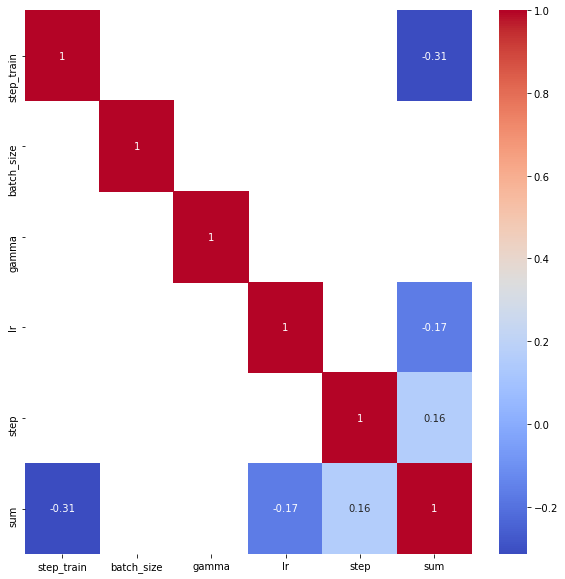

In [14]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df.corr()[abs(df.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

## Correlation matrix for best result

In [15]:
df_corr_best = df_corr[df_corr["sum"] >= 300]

<AxesSubplot:>

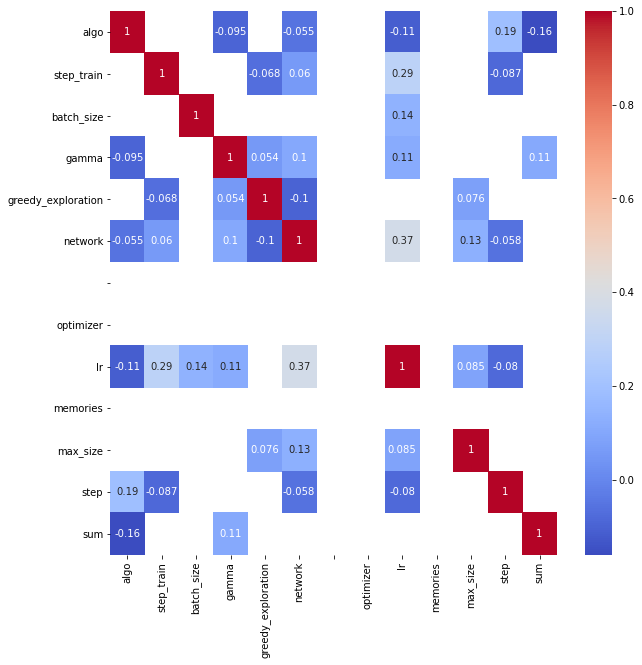

In [16]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_corr_best.corr()[abs(df_corr_best.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

# Result by algo

### DQN

#### SimpleNetwork

In [17]:
df_DQN = df[df["algo"] == "DQN"].copy()
df_DQN = df_DQN[df_DQN["network"] == "SimpleNetwork"]

In [18]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(50)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
31127,DQN,1.0,32.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,30.0,500.0
34103,DQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,30.0,500.0
33050,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.100,ExperienceReplay,2048,40.0,500.0
32648,DQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,50.0,500.0
34508,DQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,50.0,500.0
28898,DQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.001,ExperienceReplay,2048,60.0,500.0
33052,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.100,ExperienceReplay,2048,60.0,500.0
34943,DQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.100,ExperienceReplay,512,60.0,500.0
35687,DQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.100,ExperienceReplay,512,60.0,500.0
31906,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.001,ExperienceReplay,512,70.0,500.0


<AxesSubplot:>

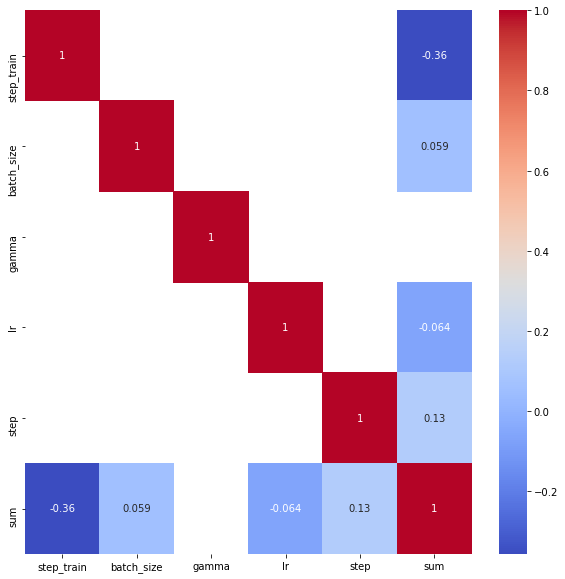

In [19]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [20]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size"]
df_DQN[df_DQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

\
algo step_train batch_size gamma greedy_exploration                      network       optimizer lr     memories         max_size       
DQN  1.0        32.0       0.99  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512       17   
                64.0       1.00  EpsilonGreedy-0.1                       SimpleNetwork Adam      0.0010 ExperienceReplay 512       14   
                32.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048      10   
                64.0       1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.1000 ExperienceReplay 512        9   
                           0.99  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.1000 ExperienceReplay 512        9   
                32.0       0.99  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       8   
                           1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048       8   
                64.0       0.99  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       8   
                           1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048       7   
                           0.99  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 512        6   
                           1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512        5   
                32.0       0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512        5   
                           1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       5   
                           0.95  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       5   
                64.0       0.99  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 2048       5   
                           1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       4   
                                 AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512        4   
                           0.99  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048       4   
                           0.95  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.1000 ExperienceReplay 512        4   
                                 AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512        4   
                                                                                                                         2048       4   
                32.0       0.95  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 512        4   
                           1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 512        4   
                           0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       3   
                64.0       0.99  EpsilonGreedy-0.1                       SimpleNetwork Adam      0.1000 ExperienceReplay 2048       3   
                32.0       0.95  EpsilonGreedy-0.1                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048       3   
                           1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.1000 ExperienceReplay 512        3   
                64.0       1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 2048       3   
                         

#### DuelingNetwork

In [21]:
df_DQN = df[df["algo"] == "DQN"].copy()
df_DQN = df_DQN[df_DQN["network"] == "SimpleDuelingNetwork"]

In [22]:
df_DQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
31716,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,30.0,500.0
27997,DQN,1.0,32.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,40.0,500.0
29082,DQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,40.0,500.0
30601,DQN,1.0,32.0,1.00,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,40.0,500.0
32461,DQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,40.0,500.0
33918,DQN,1.0,64.0,0.99,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,40.0,500.0
27626,DQN,1.0,32.0,0.95,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,50.0,500.0
29827,DQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,50.0,500.0
31346,DQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,512,50.0,500.0
32803,DQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleDuelingNetwork,,Adam,0.001,ExperienceReplay,2048,50.0,500.0


<AxesSubplot:>

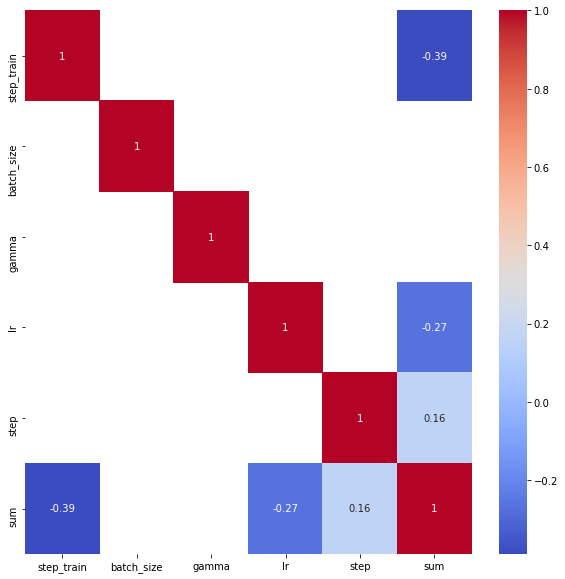

In [23]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [24]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size"]
df_DQN[df_DQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

\
algo step_train batch_size gamma greedy_exploration                      network              optimizer lr     memories         max_size       
DQN  1.0        32.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      21   
                64.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      20   
                           0.99  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      17   
                                 EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      15   
                                 AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      14   
                                 EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       14   
                32.0       1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      14   
                64.0       1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      13   
                           0.99  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      11   
                32.0       1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      11   
                                 EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       11   
                64.0       1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       10   
                           0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048       8   
                                 EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048       7   
                32.0       0.95  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048       6   
                64.0       0.95  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512        6   
                                                                                                        0.0001 ExperienceReplay 512        5   
                                 EpsilonGreedy-0.1                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048       5   
                           1.00  EpsilonGreedy-0.1                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048       5   
                           0.99  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048       4   
                           1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048       4   
                           0.95  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512        4   
                                 AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512        4   
                32.0       0.95  EpsilonGreedy-0.1                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048       4   
                           0.99  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048       4   
                64.0       0.95  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048       3   
                           0.99  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001

### DoubleDQN

#### SimpleNetwork

In [25]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()
df_DoubleDQN = df_DoubleDQN[df_DoubleDQN["network"] == "SimpleNetwork"]

In [26]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
12930,DoubleDQN,1.0,32.0,1.00,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,30.0,500.0
11412,DoubleDQN,1.0,32.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,40.0,500.0
24122,DoubleDQN,32.0,64.0,0.99,AdaptativeEpsilonGreedy-0.3-0.1-30000-0,SimpleNetwork,,Adam,0.1000,ExperienceReplay,2048,40.0,500.0
14796,DoubleDQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,90.0,500.0
17742,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,2048,100.0,500.0
14802,DoubleDQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,150.0,500.0
15580,DoubleDQN,1.0,64.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleNetwork,,Adam,0.1000,ExperienceReplay,2048,180.0,500.0
17719,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,512,180.0,500.0
15922,DoubleDQN,1.0,64.0,0.99,EpsilonGreedy-0.1,SimpleNetwork,,Adam,0.0010,ExperienceReplay,512,190.0,500.0
17720,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleNetwork,,Adam,0.0001,ExperienceReplay,512,190.0,500.0


<AxesSubplot:>

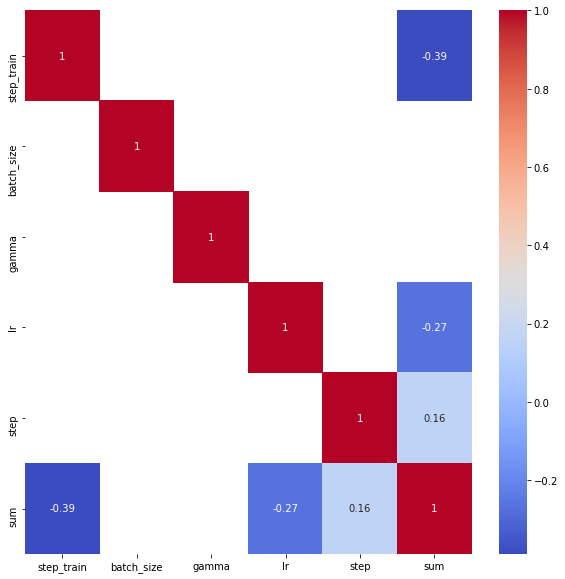

In [27]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DQN.corr()[abs(df_DQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [28]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size"]
df_DoubleDQN[df_DoubleDQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

\
algo      step_train batch_size gamma greedy_exploration                      network       optimizer lr     memories         max_size      
DoubleDQN 1.0        64.0       0.99  EpsilonGreedy-0.1                       SimpleNetwork Adam      0.0010 ExperienceReplay 512       4   
                     32.0       1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512       4   
                     64.0       1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048      3   
                                                                                                      0.0001 ExperienceReplay 512       2   
                                      AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 2048      2   
                                0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512       2   
                                      EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0001 ExperienceReplay 2048      2   
                                                                                                      0.0010 ExperienceReplay 512       2   
                                1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0001 ExperienceReplay 2048      1   
                                      AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512       1   
                                      AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 512       1   
                                                                                                      0.0010 ExperienceReplay 2048      1   
                     32.0       0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0001 ExperienceReplay 512       1   
                     64.0       0.99  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 2048      1   
                     32.0       0.95  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048      1   
                                1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 512       1   
                                      EpsilonGreedy-0.1                       SimpleNetwork Adam      0.0010 ExperienceReplay 512       1   
                                      EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0001 ExperienceReplay 2048      1   
                                0.99  EpsilonGreedy-0.1                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048      1   
          32.0       64.0       0.99  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 2048      1   

                                                                                                                                        step  \
algo      step_train batch_size gamma greedy_exploration                      network       optimizer lr     memories         max_size         
DoubleDQN 1.0        64.0       0.99  EpsilonGreedy-0.1                       SimpleNetwork Adam      0.0010 ExperienceReplay 512          4   
                     32.0       1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.0010 ExperienceReplay 512          4   
                     64.0       1.00  EpsilonGreedy-0.6                       SimpleNetwork Adam      0.0010 ExperienceReplay 2048         3   
                                                                                                      0.0001 ExperienceReplay 512          2   
                                      AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleNetwork Adam      0.1000 ExperienceReplay 2048         2   
                            

#### DuelingNetwork

In [29]:
df_DoubleDQN = df[df["algo"] == "DoubleDQN"].copy()
df_DoubleDQN = df_DoubleDQN[df_DoubleDQN["network"] == "SimpleDuelingNetwork"]

In [30]:
df_DoubleDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(10)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
12340,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,20.0,500.0
17645,DoubleDQN,1.0,64.0,1.00,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.1000,ExperienceReplay,512,60.0,500.0
13775,DoubleDQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,110.0,500.0
9747,DoubleDQN,1.0,32.0,0.95,EpsilonGreedy-0.1,SimpleDuelingNetwork,,Adam,0.0010,ExperienceReplay,2048,130.0,500.0
12320,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,512,130.0,500.0
13777,DoubleDQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,130.0,500.0
12321,DoubleDQN,1.0,32.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,512,140.0,500.0
14522,DoubleDQN,1.0,64.0,0.95,EpsilonGreedy-0.6,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,140.0,500.0
16785,DoubleDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,512,140.0,500.0
10803,DoubleDQN,1.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,SimpleDuelingNetwork,,Adam,0.0001,ExperienceReplay,2048,150.0,500.0


<AxesSubplot:>

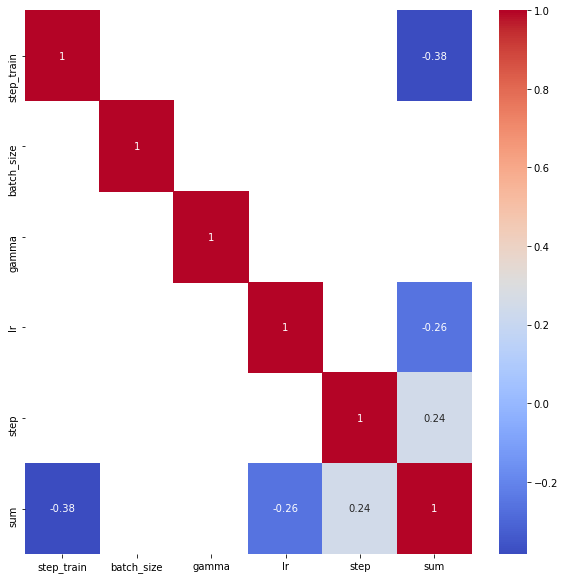

In [31]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_DoubleDQN.corr()[abs(df_DoubleDQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [32]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size"]
df_DoubleDQN[df_DoubleDQN["sum"] >= 500].groupby(by=columns, observed=True).count().sort_values(by=['sum'], ascending=False)

\
algo      step_train batch_size gamma greedy_exploration                      network              optimizer lr     memories         max_size      
DoubleDQN 1.0        64.0       0.99  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       6   
                     32.0       0.99  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      6   
                                0.95  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      5   
                     64.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      4   
                                0.99  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       4   
                                0.95  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      4   
                                      AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      4   
                                      EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      3   
                                      EpsilonGreedy-0.1                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      3   
                     32.0       0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       2   
                                1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       2   
                     64.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       2   
                                0.99  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      2   
                     32.0       0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 2048      2   
                                1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       2   
                     64.0       1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.1000 ExperienceReplay 512       2   
                     32.0       0.99  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       2   
                                                                                                                                     2048      2   
                     64.0       0.95  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       1   
                                1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       1   
                                      EpsilonGreedy-0.1                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       1   
                     32.0       0.95  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      1   
                     64.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       1   
                     32.0       0.95  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       1   
                     64.0       1.00  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 512       1   
                                0.99  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0001 ExperienceReplay 2048      1   
  

### CategoricalDQN

In [33]:
df_CategoricalDQN = df[df["algo"] == "CategoricalDQN"].copy()

In [34]:
df_CategoricalDQN.sort_values(by =["sum","step"],  ascending = [False, True]).head(20)

,algo,step_train,batch_size,gamma,greedy_exploration,network,,optimizer,lr,memories,max_size,step,sum
2672,CategoricalDQN,1.0,64.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,2048,60.0,500.0
8419,CategoricalDQN,32.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0001,ExperienceReplay,512,180.0,500.0
3979,CategoricalDQN,1.0,64.0,1.00,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,2048,110.0,403.0
5525,CategoricalDQN,32.0,32.0,0.99,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.1000,ExperienceReplay,2048,70.0,388.0
463,CategoricalDQN,1.0,32.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,2048,290.0,355.0
2163,CategoricalDQN,1.0,32.0,1.00,EpsilonGreedy-0.6,C51Network,,Adam,0.0010,ExperienceReplay,512,240.0,328.0
2659,CategoricalDQN,1.0,64.0,0.95,EpsilonGreedy-0.1,C51Network,,Adam,0.0001,ExperienceReplay,512,240.0,327.0
2488,CategoricalDQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,2048,80.0,326.0
1975,CategoricalDQN,1.0,32.0,1.00,EpsilonGreedy-0.1,C51Network,,Adam,0.0010,ExperienceReplay,512,220.0,316.0
2493,CategoricalDQN,1.0,64.0,0.95,AdaptativeEpsilonGreedy-0.8-0.2-10000-0,C51Network,,Adam,0.0010,ExperienceReplay,2048,130.0,312.0


<AxesSubplot:>

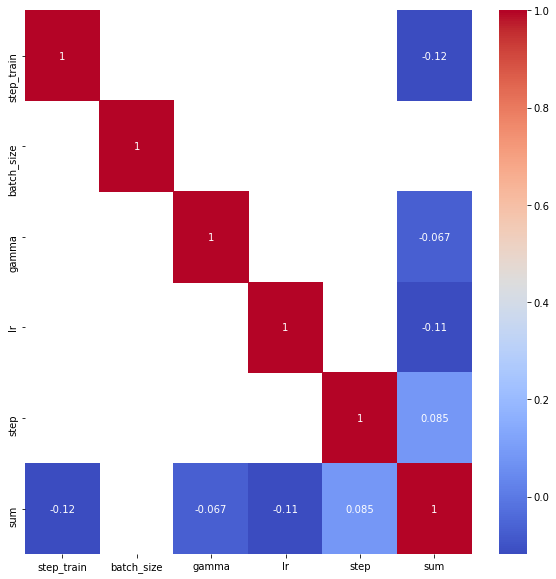

In [35]:
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(df_CategoricalDQN.corr()[abs(df_CategoricalDQN.corr()) > 0.05], annot = True, fmt='.2g',cmap= 'coolwarm', ax=ax)

In [36]:
columns = ["algo","step_train","batch_size","gamma","greedy_exploration","network","optimizer","lr","memories","max_size"]
df_CategoricalDQN[df_CategoricalDQN["sum"] >= 500].groupby(by=columns).count().sort_values(by=['sum'], ascending=False)

\
algo           step_train batch_size gamma greedy_exploration                      network              optimizer lr     memories         max_size        
CategoricalDQN 1.0        64.0       0.95  EpsilonGreedy-0.1                       C51Network           Adam      0.0010 ExperienceReplay 2048      1.0   
               32.0       64.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 C51Network           Adam      0.0001 ExperienceReplay 512       1.0   
               1.0        64.0       0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 C51Network           Adam      0.0001 ExperienceReplay 2048      NaN   
                                                                                                                                          512       NaN   
                                                                                                                  0.0010 ExperienceReplay 2048      NaN   
...                                                                                                                                                 ...   
DoubleDQN      32.0       64.0       1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512       NaN   
                                                                                   SimpleNetwork        Adam      0.0001 ExperienceReplay 2048      NaN   
                                                                                                                                          512       NaN   
                                                                                                                  0.0010 ExperienceReplay 2048      NaN   
                                                                                                                                          512       NaN   

                                                                                                                                                    step  \
algo           step_train batch_size gamma greedy_exploration                      network              optimizer lr     memories         max_size         
CategoricalDQN 1.0        64.0       0.95  EpsilonGreedy-0.1                       C51Network           Adam      0.0010 ExperienceReplay 2048       1.0   
               32.0       64.0       1.00  AdaptativeEpsilonGreedy-0.8-0.2-10000-0 C51Network           Adam      0.0001 ExperienceReplay 512        1.0   
               1.0        64.0       0.95  AdaptativeEpsilonGreedy-0.3-0.1-30000-0 C51Network           Adam      0.0001 ExperienceReplay 2048       NaN   
                                                                                                                                          512        NaN   
                                                                                                                  0.0010 ExperienceReplay 2048       NaN   
...                                                                                                                                                  ...   
DoubleDQN      32.0       64.0       1.00  EpsilonGreedy-0.6                       SimpleDuelingNetwork Adam      0.0010 ExperienceReplay 512        NaN   
                                                                                   SimpleNetwork        Adam      0.0001 ExperienceReplay 2048       NaN   
                                                                                                                                          512        NaN   
                                                                                                                  0.0010 ExperienceReplay 2048       NaN   
                                                                                                                                          512        NaN   

                                                                                                            